#### CITS5508 Assignment 2
* _File          : assignment2.ipynb_
* _Contact       : 22056151@student.uwa.edu.au_
* _Author        : Suning (Juliet) Li_
<br><br>
* _Editor        : Visual Studio Code 1.77.0_
* _Python Version: 3.10_
* _Version       : 1.0_
<br><br>
* _License       : (C)Copyright Juliet_Li_2023_
* _Description   : This is the python notebook for CITS5508 assignment 2._
* _ModifyTime    : 21/04/2023_

# Section 1: Breast cancer wisconsin (diagnostic) dataset

### Part 1: Load and Prepare the data

In [1]:
from sklearn.datasets import load_breast_cancer

breast_cancer_data = load_breast_cancer()

# features space
arr_x = breast_cancer_data.data

# target values
arr_y = breast_cancer_data.target

# feature names
feature_names = breast_cancer_data.feature_names

# target names
target_names = breast_cancer_data.target_names

In [2]:
print('The shape of the feature space is', arr_x.shape)
print('The shape of the target space is', arr_y.shape)

The shape of the feature space is (569, 30)
The shape of the target space is (569,)


In [3]:
# Load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
#Create dataframe that integrates feature and target space
df_feature = pd.DataFrame(arr_x, columns=feature_names)

# Generate correlation matrix for all features
correlation_matrix = df_feature[feature_names].corr()

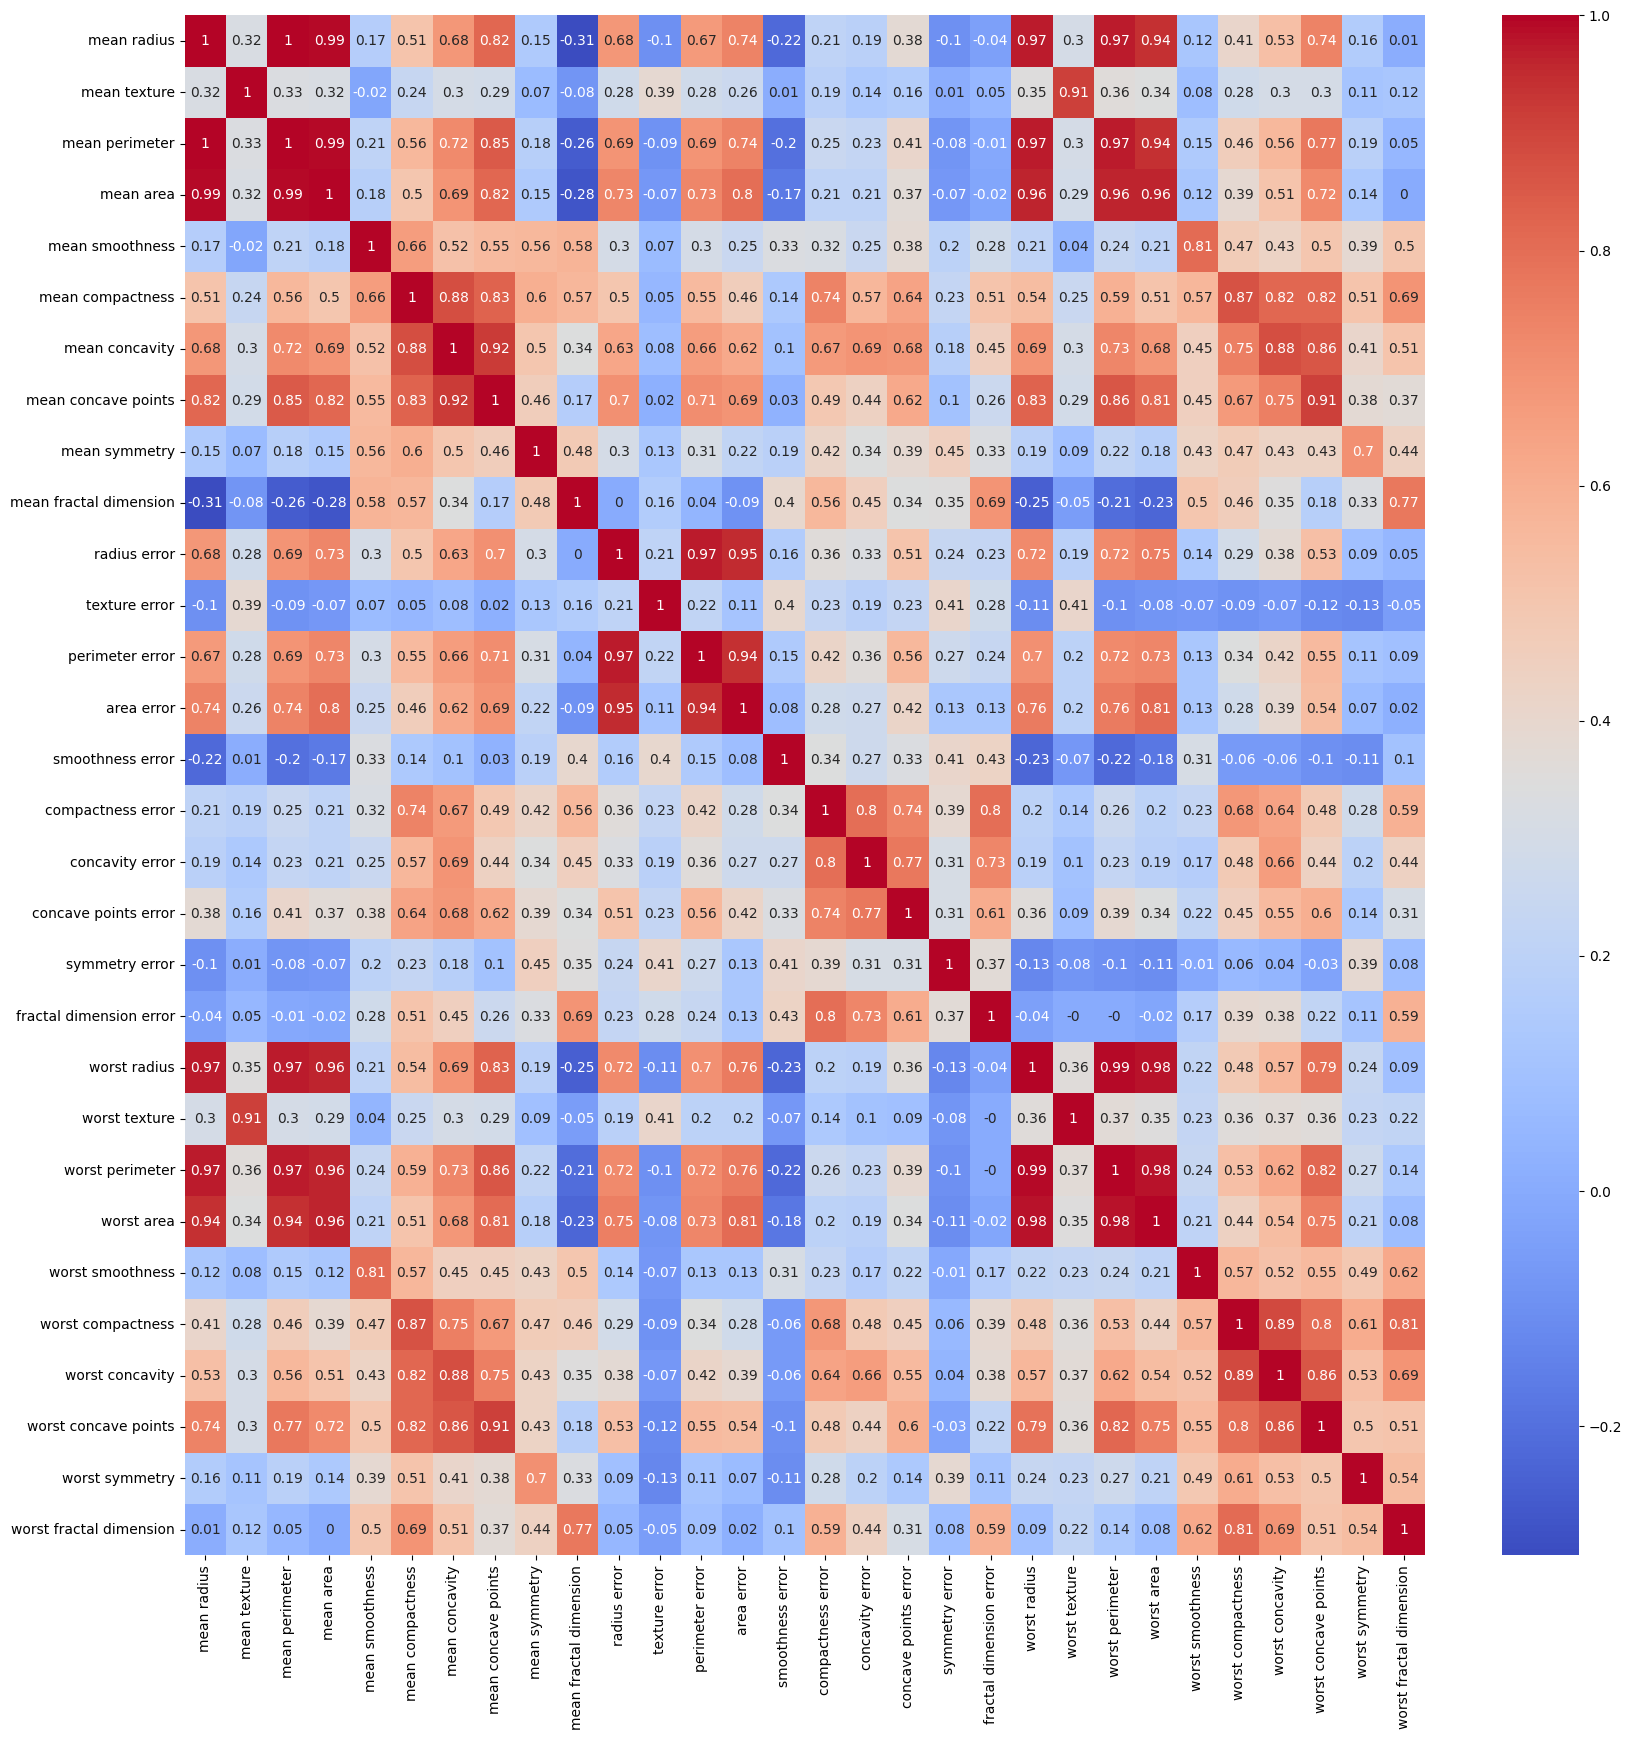

In [17]:
# Plot the correlation matrix for all features
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix.round(2), annot=True, cmap='coolwarm')
plt.show()

In [18]:
# Find features with correlation higher than 0.9 or lower than -0.9

# Define the correlation threshold
correlation_threshold = 0.9

# Create a set for the features to be dropped
features_to_drop = set()

# Loop through the correlation matrix and identify the features that are highly correlated and are to be dropped
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= correlation_threshold:
            colname = correlation_matrix.columns[i]
            
            features_to_drop.add(colname)
            # Print the highly correlated features 
            print(colname, ',', correlation_matrix.index[j], ':', correlation_matrix.iloc[i, j])

mean perimeter , mean radius : 0.9978552814938109
mean area , mean radius : 0.9873571700566127
mean area , mean perimeter : 0.9865068039913907
mean concave points , mean concavity : 0.9213910263788588
perimeter error , radius error : 0.9727936770160764
area error , radius error : 0.951830112110991
area error , perimeter error : 0.9376554069544157
worst radius , mean radius : 0.9695389726112055
worst radius , mean perimeter : 0.9694763634663146
worst radius , mean area : 0.9627460860470841
worst texture , mean texture : 0.912044588840421
worst perimeter , mean radius : 0.9651365139559871
worst perimeter , mean perimeter : 0.9703868870426394
worst perimeter , mean area : 0.9591195743552645
worst perimeter , worst radius : 0.993707916102949
worst area , mean radius : 0.9410824595860461
worst area , mean perimeter : 0.9415498080023068
worst area , mean area : 0.9592133256498998
worst area , worst radius : 0.9840145644590742
worst area , worst perimeter : 0.9775780914063871
worst concave po

In [19]:
# print the features that should be dropped as they are highly correlated with other features
print(features_to_drop)

# we will be dropping the below 10 features

{'mean perimeter', 'worst area', 'worst concave points', 'area error', 'worst perimeter', 'mean concave points', 'worst radius', 'worst texture', 'perimeter error', 'mean area'}


In [24]:
# Drop the features from the original dataframe
df_feature_dropped = df_feature.drop(features_to_drop, axis=1)

# Update the feature space
arr_x_drpped = df_feature_dropped.values

<Figure size 2000x2000 with 0 Axes>

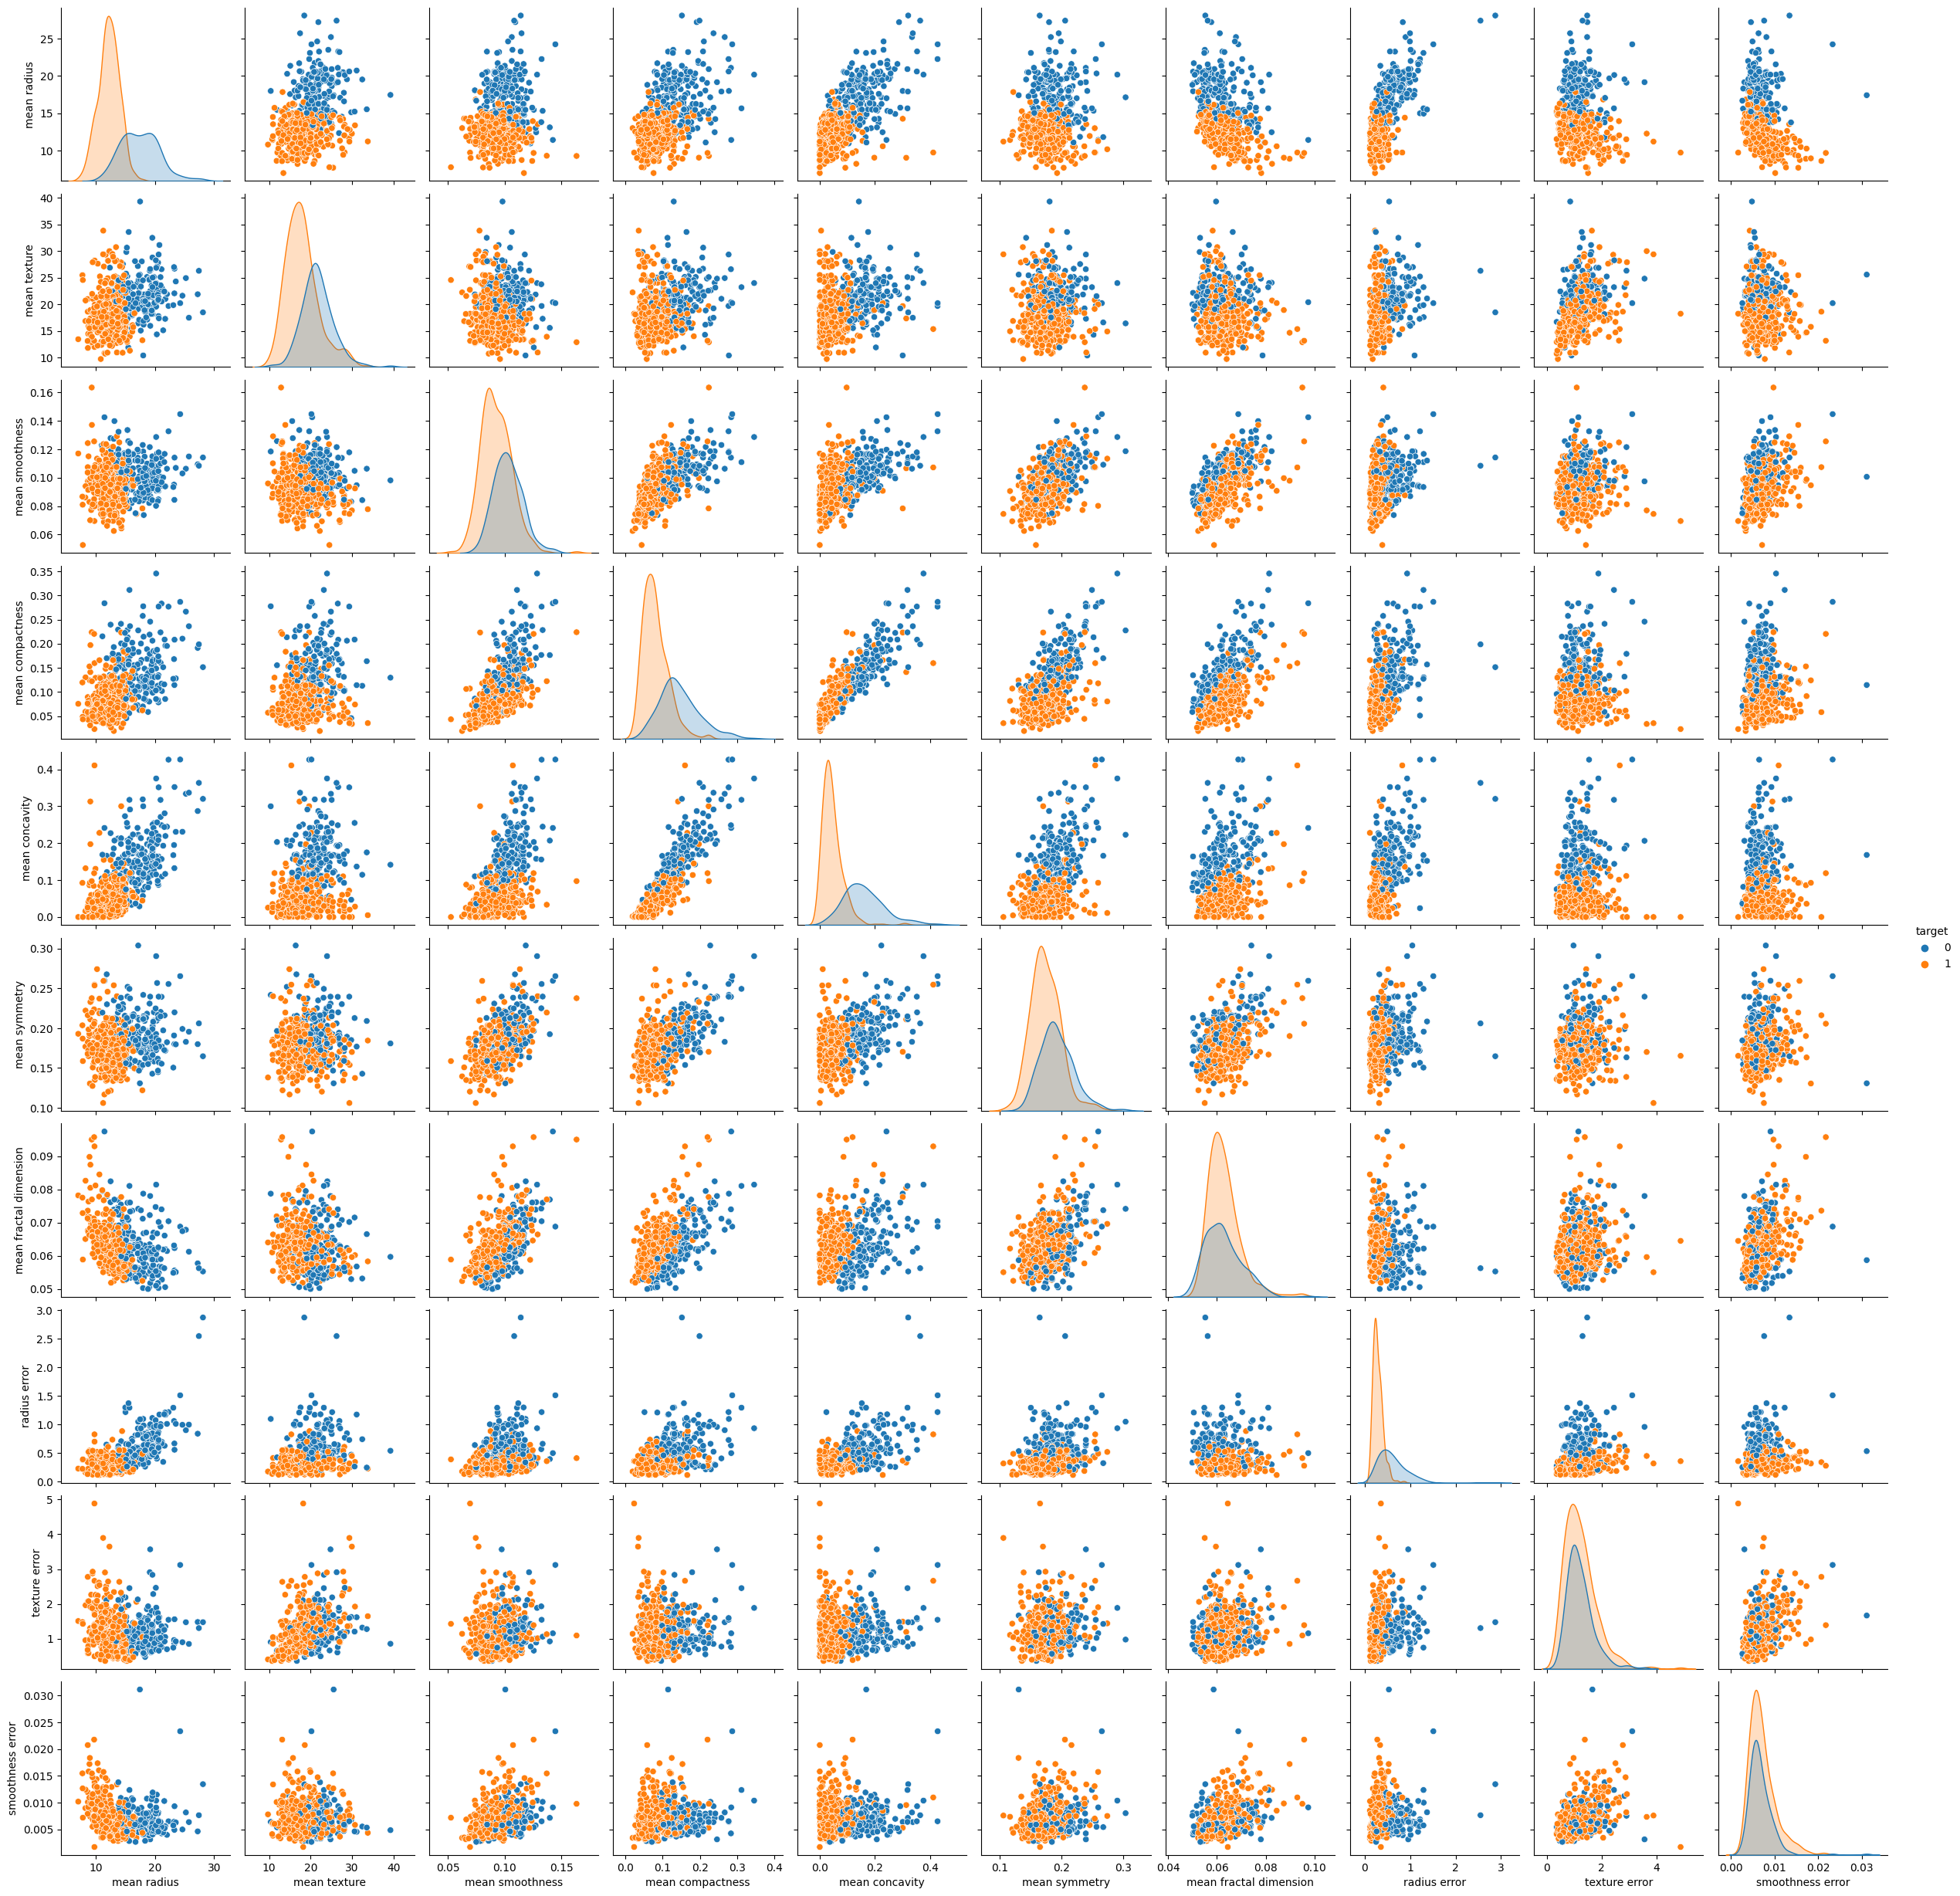

In [31]:
# select the first 10 features to plot, to see the separation of the feature space
li_selected = df_feature_dropped.columns[:10]
df_feature_dropped['target'] = arr_y

# Plot the relationship between features and target
plt.figure(figsize=(20,20))
sns.pairplot(df_feature_dropped, vars=li_selected, hue='target')
plt.show()

# As can be seen from below, the feature space is relatively separated.

In [32]:
# Split the data into training and test sets (85/15)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(arr_x, arr_y, test_size=0.15, random_state=123)

# As we are first training decision tree models, typicall decision tree does not require feature scaling. Feature scaling will not be performed here. 

# Section 2: Concrete Slump Test

# Section 3: Abalone dataset